<BarContainer object of 30 artists>

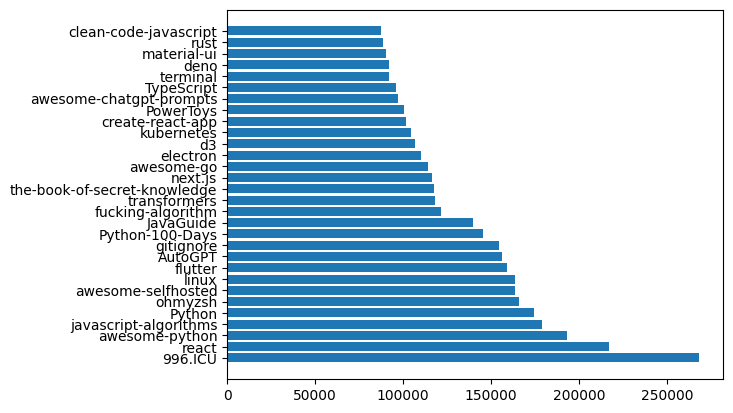

In [15]:
import requests
import json
from pprint import pprint

# get secret from Colab
from google.colab import userdata

# Retrieve the token from google colab secrets
token = userdata.get('germane4oss')

# initialize request parameters
url = 'https://api.github.com/search/repositories?q=stars:>1&sort=stars&order=desc'
headers = {'Authorization': 'Bearer ' + token}

def get_top_repositories(url, headers) -> dict:
  ''' Get top stared repositories from GitHub.

  Connect to the GitHub API and retrieve the top 30 repositories, based on the number of stars, as Python dictionary.

  Parameters
  ----------
  url : String
    Github API endpoint with query, sort criteria and order

  headers : dictionary
    Authorization entry required by the API

  Returns
  -------
  top_repositories : dict
    top repositories data retrieved from GitHub

  Examples
  --------
  github_repositories_data = get_top_repositories(url, headers)
  pprint(github_repositories_data)

  {'allow_forking': True,
   'archive_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/{archive_format}{/ref}',
   'archived': False,
   'assignees_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/assignees{/user}',
   'blobs_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/git/blobs{/sha}',
   'branches_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/branches{/branch}',
   'clone_url': 'https://github.com/freeCodeCamp/freeCodeCamp.git',
   'collaborators_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/collaborators{/collaborator}',
   'comments_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/comments{/number}',
   'commits_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/commits{/sha}',
   'compare_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/compare/{base}...{head}',
   'contents_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/contents/{+path}',
   'contributors_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/contributors',
   'created_at': '2014-12-24T17:49:19Z',
   'default_branch': 'main',
   'deployments_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/deployments',
   'description': "freeCodeCamp.org's open-source codebase and "
                  'curriculum. Learn to code for free.',
   'disabled': False,
   'downloads_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/downloads',
   'events_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/events',
   'fork': False,
   'forks': 35334,
   'forks_count': 35334,
   'forks_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/forks',
   'full_name': 'freeCodeCamp/freeCodeCamp',
   'git_commits_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/git/commits{/sha}',
   'git_refs_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/git/refs{/sha}',
   'git_tags_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/git/tags{/sha}',
   'git_url': 'git://github.com/freeCodeCamp/freeCodeCamp.git',
   'has_discussions': False,
   'has_downloads': True,
   'has_issues': True,
   'has_pages': True,
   'has_projects': True,
   'has_wiki': False,
   'homepage': 'http://contribute.freecodecamp.org/',
   'hooks_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/hooks',
   'html_url': 'https://github.com/freeCodeCamp/freeCodeCamp',
   'id': 28457823,
   'is_template': False,
   'issue_comment_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/issues/comments{/number}',
   'issue_events_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/issues/events{/number}',
   'issues_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/issues{/number}',
   'keys_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/keys{/key_id}',
   'labels_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/labels{/name}',
   'language': 'TypeScript',
   'languages_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/languages',
   'license': {'key': 'bsd-3-clause',
               'name': 'BSD 3-Clause "New" or "Revised" License',
               'node_id': 'MDc6TGljZW5zZTU=',
               'spdx_id': 'BSD-3-Clause',
               'url': 'https://api.github.com/licenses/bsd-3-clause'},
   'merges_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/merges',
   'milestones_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/milestones{/number}',
   'mirror_url': None,
   'name': 'freeCodeCamp',
   'node_id': 'MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==',
   'notifications_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/notifications{?since,all,participating}',
   'open_issues': 361,
   'open_issues_count': 361,
   'owner': {'avatar_url': 'https://avatars.githubusercontent.com/u/9892522?v=4',
             'events_url': 'https://api.github.com/users/freeCodeCamp/events{/privacy}',
             'followers_url': 'https://api.github.com/users/freeCodeCamp/followers',
             'following_url': 'https://api.github.com/users/freeCodeCamp/following{/other_user}',
             'gists_url': 'https://api.github.com/users/freeCodeCamp/gists{/gist_id}',
             'gravatar_id': '',
             'html_url': 'https://github.com/freeCodeCamp',
             'id': 9892522,
             'login': 'freeCodeCamp',
             'node_id': 'MDEyOk9yZ2FuaXphdGlvbjk4OTI1MjI=',
             'organizations_url': 'https://api.github.com/users/freeCodeCamp/orgs',
             'received_events_url': 'https://api.github.com/users/freeCodeCamp/received_events',
             'repos_url': 'https://api.github.com/users/freeCodeCamp/repos',
             'site_admin': False,
             'starred_url': 'https://api.github.com/users/freeCodeCamp/starred{/owner}{/repo}',
             'subscriptions_url': 'https://api.github.com/users/freeCodeCamp/subscriptions',
             'type': 'Organization',
             'url': 'https://api.github.com/users/freeCodeCamp'},
   'permissions': {'admin': False,
                   'maintain': False,
                   'pull': True,
                   'push': False,
                   'triage': False},
   'private': False,
   'pulls_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/pulls{/number}',
   'pushed_at': '2024-01-05T16:31:41Z',
   'releases_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/releases{/id}',
   'score': 1.0,
   'size': 402832,
   'ssh_url': 'git@github.com:freeCodeCamp/freeCodeCamp.git',
   'stargazers_count': 380912,
   'stargazers_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/stargazers',
   'statuses_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/statuses/{sha}',
   'subscribers_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/subscribers',
   'subscription_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/subscription',
   'svn_url': 'https://github.com/freeCodeCamp/freeCodeCamp',
   'tags_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/tags',
   'teams_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/teams',
   'topics': ['careers',
              'certification',
              'community',
              'curriculum',
              'd3',
              'education',
              'freecodecamp',
              'hacktoberfest',
              'javascript',
              'learn-to-code',
              'math',
              'nodejs',
              'nonprofits',
              'programming',
              'react',
              'teachers'],
   'trees_url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp/git/trees{/sha}',
   'updated_at': '2024-01-05T16:38:58Z',
   'url': 'https://api.github.com/repos/freeCodeCamp/freeCodeCamp',
   'visibility': 'public',
   'watchers': 380912,
   'watchers_count': 380912,
   'web_commit_signoff_required': False},
   ...
  '''

  try:
    # send request to GitHub
    github_response = requests.get(url, headers=headers)

  except requests.exceptions.ConnectionError:
    print('Unable to retrieve Information from GitHub')

  return github_response


# Get Github Repositories Data
github_repositories_data = get_top_repositories(url, headers)

#Convert the response to json
github_data_json = json.loads(github_repositories_data.text)

# Load json into a dictionary

items = github_data_json['items']
# Define repo_name and repo_starts arrays for plotting

repo_name=[]
repo_stars=[]

# Iterate the received data to populate repo_name and repo_stars

for item in items:
  repo_name.append(item['name'])
  repo_stars.append(item['stargazers_count'])

# import matplotlib

import matplotlib.pyplot as plt

# plot the data

plt.barh(repo_name, repo_stars)
